<a href="https://colab.research.google.com/github/rtrochepy/astronomer/blob/main/preprocess_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings

# Ignorar advertencias de pandas para una ejecución más limpia
warnings.filterwarnings('ignore')

# Configuración de pandas para mostrar todas las columnas al imprimir
pd.set_option('display.max_columns', None)

# Leer el archivo CSV y cargarlo en un DataFrame
df = pd.read_csv("data_labels.csv")

In [ ]:
print("Antes de limpieza:", df['label'].value_counts())

In [2]:


# Mostrar las primeras filas y la forma inicial del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())
print("\nDimensiones del DataFrame (filas, columnas):", df.shape)

Primeras filas del DataFrame:
                                                  ID Expenditure_AHF  \
0  1547558447248542464208633772467833372637054433...      2017-10-23   
1  8303023334174375372752224543342433062237135032...      2017-05-16   
2  6205323654737347834626173852036442544385334747...      2017-12-15   
3  3727835411357335232137873674310300621187543222...      2018-02-02   
4  3526827315715777302832343600863305043273474403...      2017-05-31   

   Payment_6804  Infraction_CGP  Base_7744  Base_80863  Risk_1930  \
0      0.983147        0.001925   0.024150    1.009185   0.006479   
1      0.845400        0.001012   0.032260    1.008112   0.001539   
2      0.773748        0.008989   0.007325    0.817528   0.008786   
3      0.853480        0.653419   0.107481    0.816447   0.007058   
4      0.632887        0.000809   0.009320    0.812306   0.001417   

   Expenditure_JIG  Infraction_SNZ  Base_02683  Infraction_SBF  \
0         0.104240        0.005930    0.008182          

In [3]:
print("Antes de limpieza:", df['label'].value_counts())

Antes de limpieza: label
0.0    7788
Name: count, dtype: int64


In [1]:
# Identificar valores nulos por columna
nulos_por_columna = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
print("\nColumnas con valores nulos y su cantidad:")
print(columnas_con_nulos)

# Calcular el umbral para filtrar columnas con más del 50% de valores nulos
umbral = 0.5 * df.shape[0]
print(f"\nUmbral para eliminar columnas (más del 50% de valores nulos): {umbral}")

# Eliminar columnas con más del 50% de valores nulos
columnas_a_eliminar = columnas_con_nulos[columnas_con_nulos > umbral].index
df = df.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame después de la limpieza
print("\nColumnas eliminadas:", list(columnas_a_eliminar))
print("\nDimensiones del DataFrame después de la limpieza (filas, columnas):", df.shape)
print("\nPrimeras filas del DataFrame después de la limpieza:")
print(df.head())


Primeras filas del DataFrame:
                                                  ID Expenditure_AHF  \
0  1547558447248542464208633772467833372637054433...      2017-10-23   
1  8303023334174375372752224543342433062237135032...      2017-05-16   
2  6205323654737347834626173852036442544385334747...      2017-12-15   
3  3727835411357335232137873674310300621187543222...      2018-02-02   
4  3526827315715777302832343600863305043273474403...      2017-05-31   

   Payment_6804  Infraction_CGP  Base_7744  Base_80863  Risk_1930  \
0      0.983147        0.001925   0.024150    1.009185   0.006479   
1      0.845400        0.001012   0.032260    1.008112   0.001539   
2      0.773748        0.008989   0.007325    0.817528   0.008786   
3      0.853480        0.653419   0.107481    0.816447   0.007058   
4      0.632887        0.000809   0.009320    0.812306   0.001417   

   Expenditure_JIG  Infraction_SNZ  Base_02683  Infraction_SBF  \
0         0.104240        0.005930    0.008182          

In [2]:
print("Antes de limpieza:", df['label'].value_counts())

Antes de limpieza: label
0.0    3893
Name: count, dtype: int64


In [3]:
# Verificar distribución inicial de clases
print("Distribución inicial de clases en 'label':")
print(df['label'].value_counts())

Distribución inicial de clases en 'label':
label
0.0    3893
Name: count, dtype: int64


In [4]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Definir las columnas no numéricas
non_numerical_columns = [
    'ID', 'Expenditure_AHF', 'Infraction_YFSG', 'Infraction_DQLY', 'Infraction_CLH',
    'Base_67254', 'Infraction_TEN', 'Base_8730', 'Base_23737', 'Infraction_NMCB',
    'Infraction_ZRH', 'Infraction_WIS', 'Infraction_WMAQ', 'label'
]

# Seleccionar solo las columnas numéricas
numerical_columns = [col for col in df.columns if col not in non_numerical_columns]

# Calcular el porcentaje de valores nulos en cada columna numérica
null_percentage = df[numerical_columns].isnull().mean() * 100

# Agrupar columnas en función del porcentaje de valores nulos
low_null_columns = null_percentage[null_percentage < 10].index  # Menos del 10% de nulos
mid_null_columns = null_percentage[(null_percentage >= 10) & (null_percentage < 30)].index  # 10%-30% de nulos
high_null_columns = null_percentage[null_percentage >= 30].index  # Más del 30% de nulos

# Rellenar valores nulos según la estrategia definida
if not low_null_columns.empty:
    df[low_null_columns] = df[low_null_columns].fillna(df[low_null_columns].mean())

if not mid_null_columns.empty:
    df[mid_null_columns] = df[mid_null_columns].fillna(df[mid_null_columns].median())

if not high_null_columns.empty:
    imputer = IterativeImputer(random_state=42)
    df[high_null_columns] = pd.DataFrame(
        imputer.fit_transform(df[high_null_columns]),
        columns=high_null_columns,
        index=df.index
    )

# Resumen de resultados
print("Columnas con menos del 10% de nulos:", list(low_null_columns))
print("Columnas con entre 10% y 30% de nulos:", list(mid_null_columns))
print("Columnas con más del 30% de nulos:", list(high_null_columns))

Columnas con menos del 10% de nulos: ['Payment_6804', 'Infraction_CGP', 'Base_7744', 'Base_80863', 'Risk_1930', 'Infraction_SNZ', 'Base_02683', 'Infraction_QJJF', 'Base_76065', 'Infraction_EJZ', 'Base_6872', 'Risk_0322', 'Infraction_GGO', 'Base_1165', 'Base_39598', 'Base_6187', 'Infraction_ZTNC', 'Base_85131', 'Risk_9995', 'Infraction_AYWV', 'Payment_22507', 'Base_9516', 'Expenditure_YTR', 'Base_36384', 'Expenditure_FIP', 'Infraction_PAS', 'Risk_0003', 'Base_24406', 'Expenditure_LMSR', 'Infraction_BSU', 'Base_14808', 'Risk_8065', 'Infraction_ZYW', 'Base_1039', 'Infraction_HSSU', 'Infraction_EHZP', 'Base_0580', 'Expenditure_RGD', 'Infraction_AQO', 'Base_0229', 'Base_69608', 'Base_91828', 'Base_6852', 'Expenditure_IDZ', 'Risk_1475', 'Expenditure_BWX', 'Base_8511', 'Infraction_JYZB', 'Base_22178', 'Infraction_ZTYG', 'Infraction_ZVW', 'Infraction_EYU', 'Expenditure_UWVG', 'Base_3041', 'Payment_3207', 'Infraction_QKZN', 'Infraction_CZE', 'Base_65352', 'Risk_7095', 'Base_66195', 'Base_36516'

In [5]:
print("Después de limpieza:", df['label'].value_counts())

Después de limpieza: label
0.0    3893
Name: count, dtype: int64


In [6]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Definir las columnas no numéricas
non_numerical_columns = [
    'ID', 'Expenditure_AHF', 'Infraction_YFSG', 'Infraction_DQLY', 'Infraction_CLH',
    'Base_67254', 'Infraction_TEN', 'Base_8730', 'Base_23737', 'Infraction_NMCB',
    'Infraction_ZRH', 'Infraction_WIS', 'Infraction_WMAQ', 'label'
]

# Seleccionar solo las columnas numéricas
numerical_columns = [col for col in df.columns if col not in non_numerical_columns]

# Calcular el porcentaje de valores nulos en cada columna numérica
null_percentage = df[numerical_columns].isnull().mean() * 100

# Agrupar columnas en función del porcentaje de valores nulos
low_null_columns = null_percentage[null_percentage < 10].index  # Menos del 10% de nulos
mid_null_columns = null_percentage[(null_percentage >= 10) & (null_percentage < 30)].index  # 10%-30% de nulos
high_null_columns = null_percentage[null_percentage >= 30].index  # Más del 30% de nulos

# Rellenar valores nulos según la estrategia definida
if not low_null_columns.empty:
    df[low_null_columns] = df[low_null_columns].fillna(df[low_null_columns].mean())

if not mid_null_columns.empty:
    df[mid_null_columns] = df[mid_null_columns].fillna(df[mid_null_columns].median())

if not high_null_columns.empty:
    imputer = IterativeImputer(random_state=42)
    df[high_null_columns] = pd.DataFrame(
        imputer.fit_transform(df[high_null_columns]),
        columns=high_null_columns,
        index=df.index
    )

# Resumen de resultados
print("Columnas con menos del 10% de nulos:", list(low_null_columns))
print("Columnas con entre 10% y 30% de nulos:", list(mid_null_columns))
print("Columnas con más del 30% de nulos:", list(high_null_columns))

Columnas con menos del 10% de nulos: ['Payment_6804', 'Infraction_CGP', 'Base_7744', 'Base_80863', 'Risk_1930', 'Expenditure_JIG', 'Infraction_SNZ', 'Base_02683', 'Infraction_ZWWJ', 'Infraction_QJJF', 'Base_76065', 'Infraction_EJZ', 'Base_6872', 'Risk_0322', 'Infraction_FMXQ', 'Infraction_GGO', 'Infraction_TLPJ', 'Base_1165', 'Base_39598', 'Base_6187', 'Infraction_ZTNC', 'Base_85131', 'Risk_9995', 'Infraction_AYWV', 'Payment_22507', 'Base_9516', 'Expenditure_YTR', 'Base_36384', 'Expenditure_FIP', 'Infraction_PAS', 'Risk_0003', 'Expenditure_HMO', 'Base_24406', 'Expenditure_LMSR', 'Infraction_BSU', 'Infraction_GEL', 'Base_14808', 'Risk_8065', 'Infraction_ZYW', 'Base_1039', 'Infraction_HSSU', 'Infraction_EHZP', 'Infraction_TBP', 'Base_0580', 'Expenditure_RGD', 'Infraction_PBC', 'Infraction_AQO', 'Base_0229', 'Base_69608', 'Base_91828', 'Base_6852', 'Expenditure_IDZ', 'Risk_1475', 'Expenditure_BWX', 'Base_8511', 'Infraction_JYZB', 'Base_22178', 'Infraction_ZTYG', 'Infraction_ZVW', 'Infract

In [7]:
print("Después de limpieza:", df['label'].value_counts())

Después de limpieza: label
0.0    3893
Name: count, dtype: int64


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Definir las columnas categóricas
categoricas = ['Infraction_CLH', 'Base_67254', 'Infraction_TEN',
               'Infraction_YFSG', 'Infraction_DQLY', 'Base_8730',
               'Infraction_WMAQ', 'Base_23737', 'Infraction_NMCB',
               'Infraction_ZRH', 'Infraction_WIS']

# Filtrar columnas categóricas existentes en el DataFrame
categoricas = [col for col in categoricas if col in df.columns]

# Convertir las columnas categóricas a tipo 'category'
df[categoricas] = df[categoricas].astype('category')

# Función para aplicar binning a columnas con un orden implícito, manteniendo la categoría 'Missing'
def binarize_levels_with_missing(value):
    if value == 'Missing':
        return 'Missing'
    elif value in ['very_low', 'low', 'moderate_low', 'extremely_low']:
        return 'low'
    elif value in ['moderate', 'moderate_high']:
        return 'moderate'
    else:
        return 'high'

# Aplicar binning a las columnas con un orden implícito
columns_with_order = ['Infraction_CLH', 'Base_67254', 'Infraction_TEN']
for col in columns_with_order:
    if col in df.columns:  # Verificar si la columna existe
        df[col] = df[col].apply(binarize_levels_with_missing)

# Aplicar One-Hot Encoding a las columnas categóricas después de binning
columns_for_one_hot = ['Infraction_CLH', 'Base_67254', 'Infraction_TEN',
                       'Infraction_YFSG', 'Infraction_DQLY', 'Base_8730', 'Infraction_WMAQ']
columns_for_one_hot = [col for col in columns_for_one_hot if col in df.columns]  # Filtrar columnas existentes
df = pd.get_dummies(df, columns=columns_for_one_hot, drop_first=False)

# Manejar columnas binarias asegurando compatibilidad de tipos antes de aplicar Label Encoding
binary_columns = ['Base_23737', 'Infraction_NMCB', 'Infraction_ZRH', 'Infraction_WIS']
binary_columns = [col for col in binary_columns if col in df.columns]  # Filtrar columnas existentes
df[binary_columns] = df[binary_columns].astype(str)  # Asegurar consistencia de tipo

# Aplicar Label Encoding a columnas binarias
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

# Verificar que la columna 'label' solo tiene valores 0 y 1
if 'label' in df.columns:
    print("Valores únicos en 'label':", df['label'].unique())
    # Transformar a valores binarios si es necesario
    df['label'] = df['label'].map({0: 0, 1: 1, 'yes': 1, 'no': 0, True: 1, False: 0}).fillna(0).astype(int)

# Convertir la columna 'Expenditure_AHF' a tipo datetime
if 'Expenditure_AHF' in df.columns:
    df['Expenditure_AHF'] = pd.to_datetime(df['Expenditure_AHF'], errors='coerce')

# Establecer la columna 'ID' como índice
if 'ID' in df.columns:
    df.set_index('ID', inplace=True)

# Mostrar DataFrame resultante
print("DataFrame después de procesar columnas categóricas y codificaciones:")
print(df.head())

# Verificar que no haya nulos restantes
nulos_por_columna_2 = df.isnull().sum()
nulos_por_columna_2 = nulos_por_columna_2[nulos_por_columna_2 > 0]

if not nulos_por_columna_2.empty:
    print("\nColumnas con valores nulos restantes:")
    print(nulos_por_columna_2)
else:
    print("\nNo hay valores nulos restantes en el DataFrame.")

Valores únicos en 'label': [ 0. nan]
DataFrame después de procesar columnas categóricas y codificaciones:
                                                   Expenditure_AHF  \
ID                                                                   
15475584472485424642086337724678333726370544333...      2017-10-23   
83030233341743753727522245433424330622371350326...      2017-05-16   
62053236547373478346261738520364425443853347476...      2017-12-15   
37278354113573352321378736743103006211875432226...      2018-02-02   
35268273157157773028323436008633050432734744035...      2017-05-31   

                                                    Payment_6804  \
ID                                                                 
15475584472485424642086337724678333726370544333...      0.983147   
83030233341743753727522245433424330622371350326...      0.845400   
62053236547373478346261738520364425443853347476...      0.773748   
37278354113573352321378736743103006211875432226...      0.85348

In [9]:
print("Después de limpieza:", df['label'].value_counts())

Después de limpieza: label
0    3894
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Graficar histogramas en un grid
plt.figure(figsize=(20, 20))
df[numeric_columns].hist(bins=20, figsize=(20, 20))
plt.suptitle("Histogramas de columnas numéricas", fontsize=16)
plt.tight_layout()
plt.show()


<Figure size 2000x2000 with 0 Axes>

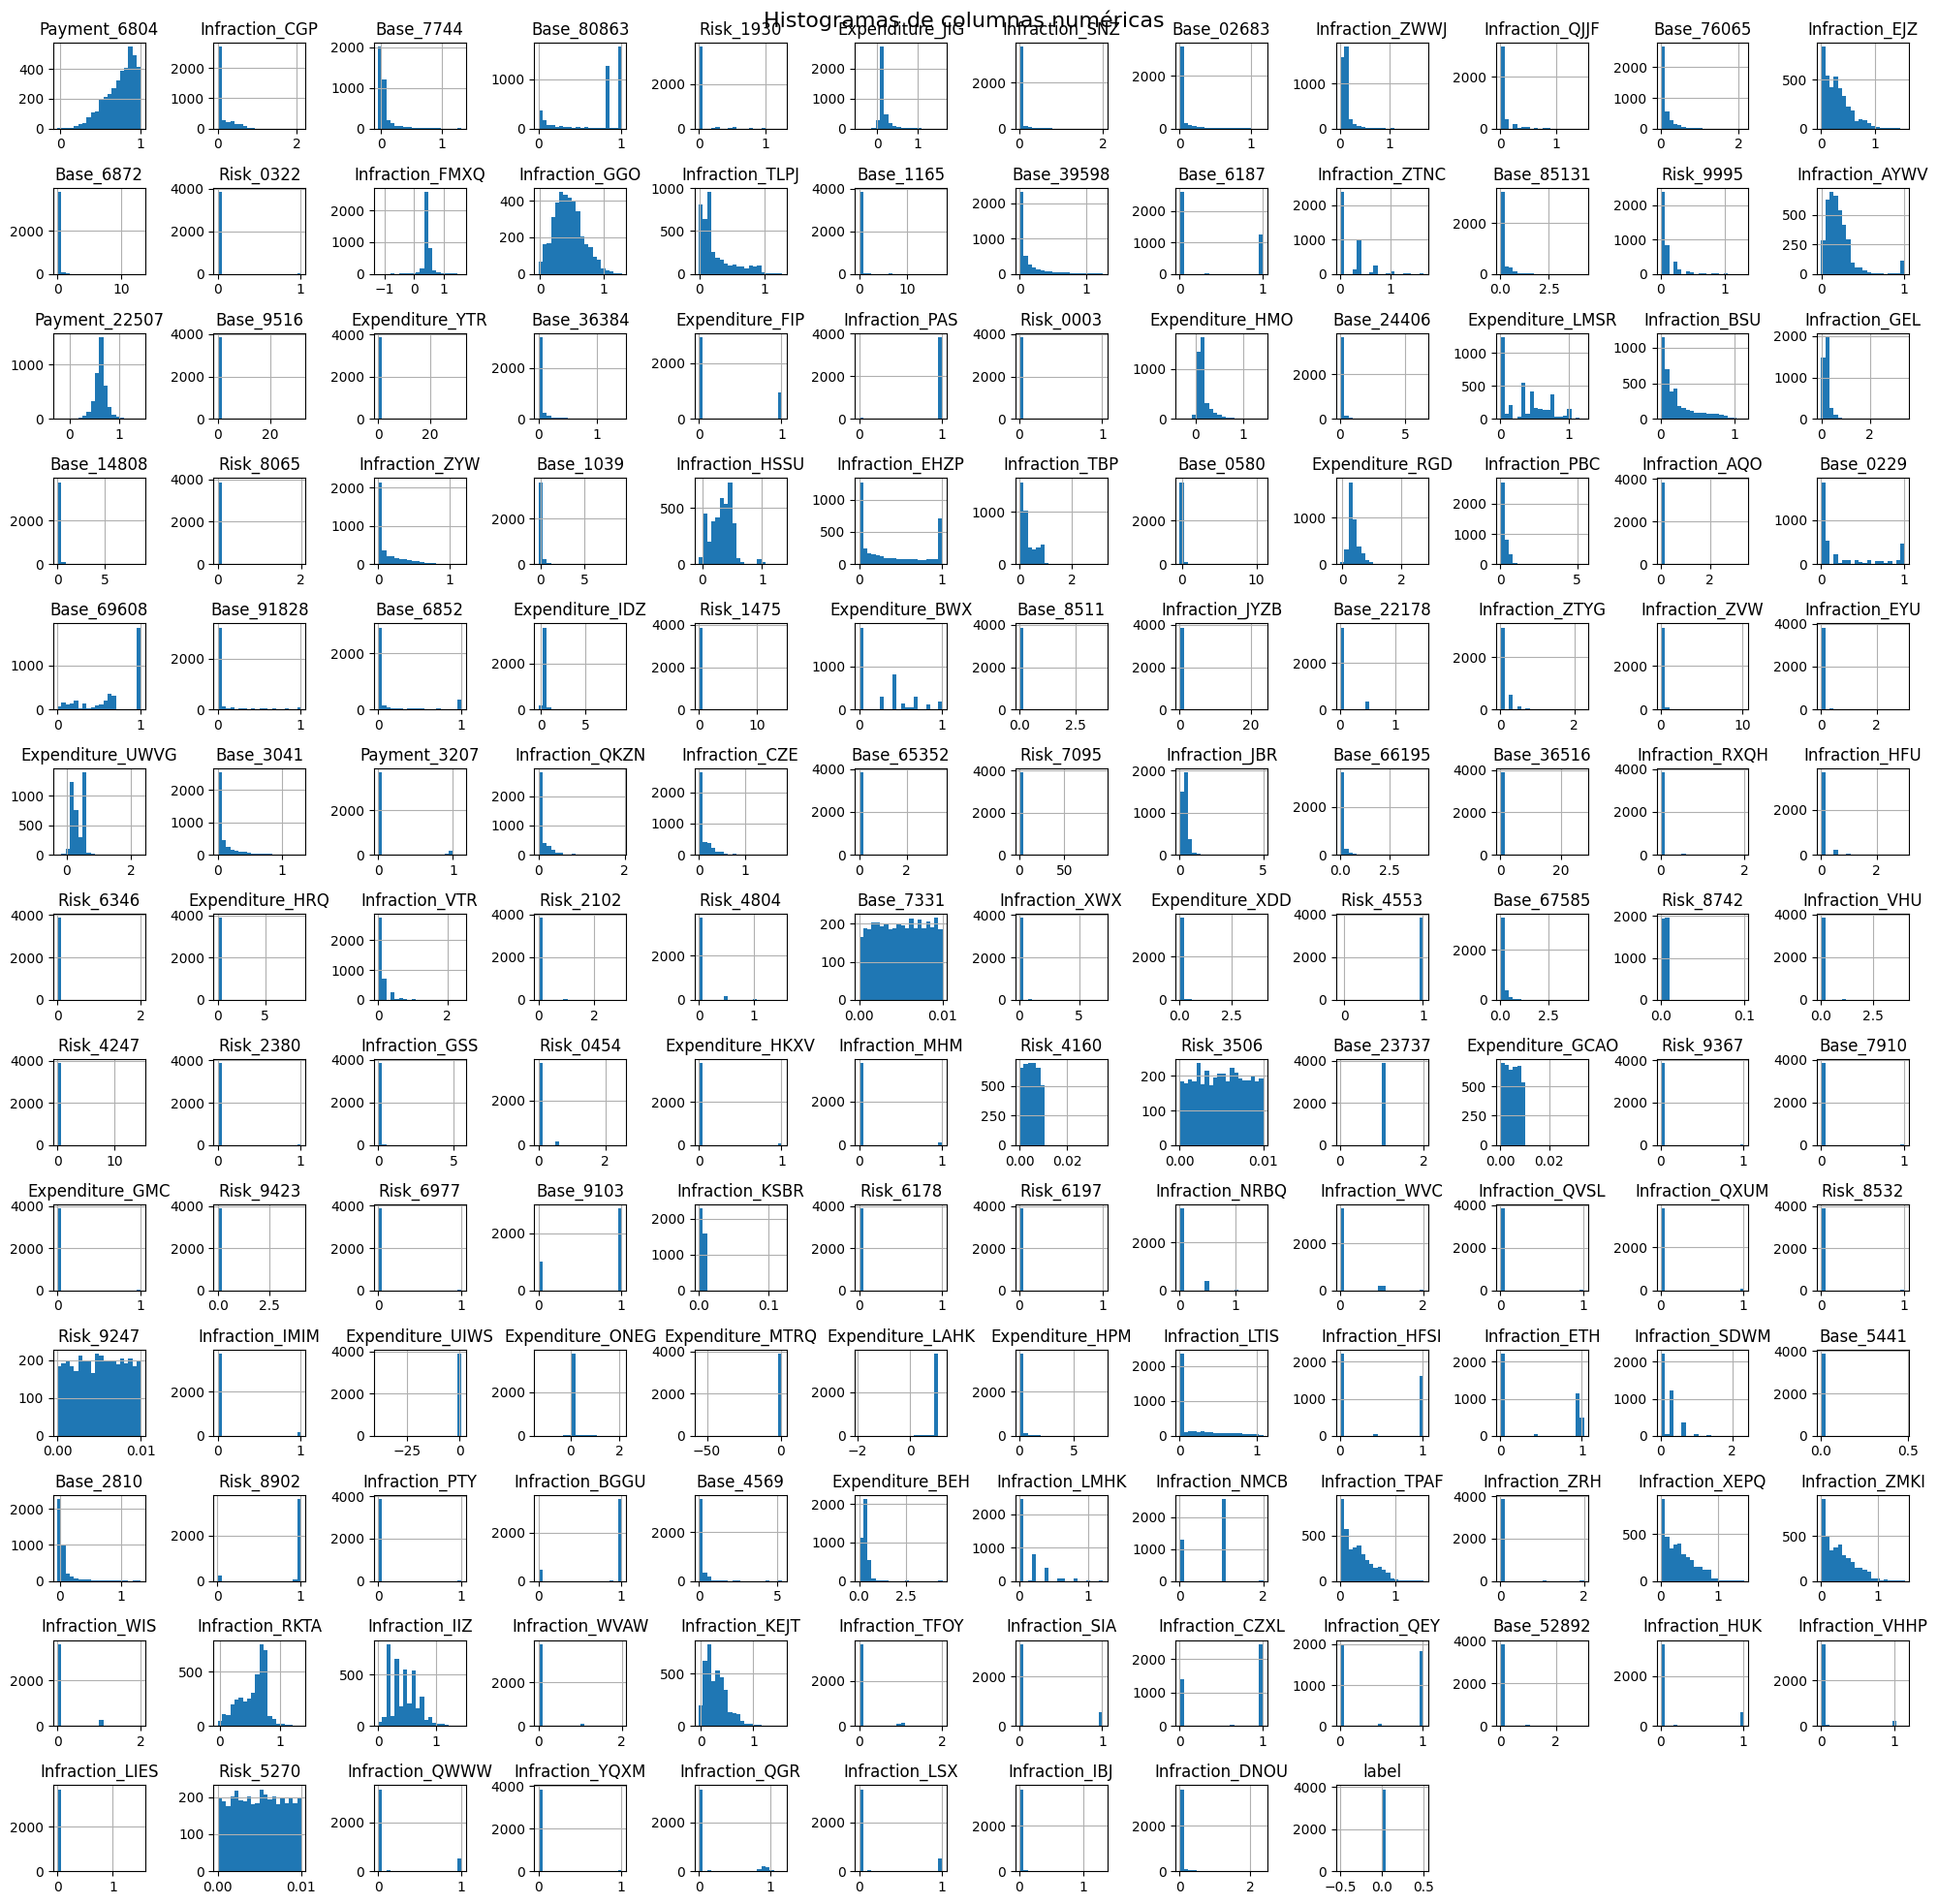

Número de outliers por columna (IQR):
 Payment_6804        40
Infraction_CGP     393
Base_7744          524
Base_80863         859
Risk_1930          236
                  ... 
Infraction_QGR     556
Infraction_LSX     556
Infraction_IBJ     327
Infraction_DNOU    556
label                0
Length: 153, dtype: int64

Porcentaje de outliers por columna (IQR):
 Payment_6804        1.027221
Infraction_CGP     10.092450
Base_7744          13.456600
Base_80863         22.059579
Risk_1930           6.060606
                     ...    
Infraction_QGR     14.278377
Infraction_LSX     14.278377
Infraction_IBJ      8.397535
Infraction_DNOU    14.278377
label               0.000000
Length: 153, dtype: float64

Columnas filtradas por porcentaje de outliers (<5%): ['Payment_6804', 'Infraction_EJZ', 'Risk_0322', 'Infraction_GGO', 'Base_1165', 'Base_6187', 'Infraction_ZTNC', 'Base_9516', 'Infraction_PAS', 'Risk_0003', 'Expenditure_LMSR', 'Risk_8065', 'Infraction_HSSU', 'Infraction_EHZP', 'Infraction

In [10]:
# Calcular IQR y límites para identificar outliers
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_limits = Q1 - 1.5 * IQR
upper_limits = Q3 + 1.5 * IQR

# Identificar y contar outliers
outliers = (df[numeric_columns] < lower_limits) | (df[numeric_columns] > upper_limits)
outliers_count = outliers.sum(axis=0)

# Calcular porcentaje de outliers
total_rows = len(df)
outliers_percentage = (outliers_count / total_rows) * 100

# Mostrar resumen de outliers
print("Número de outliers por columna (IQR):\n", outliers_count)
print("\nPorcentaje de outliers por columna (IQR):\n", outliers_percentage)

# Filtrar columnas con menos del 5% de outliers
columns_to_filter = outliers_percentage[outliers_percentage < 5].index

# Eliminar filas con outliers en las columnas seleccionadas
for col in columns_to_filter:
    df = df[(df[col] >= lower_limits[col]) & (df[col] <= upper_limits[col])]

# Resumen final
print("\nColumnas filtradas por porcentaje de outliers (<5%):", list(columns_to_filter))
print(f"Número de filas después de eliminar outliers: {len(df)}")

In [11]:
print("Después de limpieza:", df['label'].value_counts())

Después de limpieza: label
0    2157
Name: count, dtype: int64
